# Download das bibliotecas

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from yellowbrick.classifier import ROCAUC
from sklearn.metrics import confusion_matrix
import joblib

# Mostrando todas as linhas e colunas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Removendo avisos
import warnings
warnings.filterwarnings("ignore")

In [3]:
#pip install -U imbalanced-learn

# Fazendo download dos datasets


### Dataset de Treino

In [4]:
df_train = pd.read_csv("https://raw.githubusercontent.com/MSercundes/challenge-data-scientist/main/Datasets/train", sep = ',')
df_train.head(10)

,REF_DATE,TARGET,VAR2,IDADE,VAR4,VAR5,VAR6,VAR7,VAR8,VAR9,VAR10,VAR11,VAR12,VAR13,VAR14,VAR15,VAR16,VAR17,VAR18,VAR19,VAR20,VAR21,VAR22,VAR23,VAR24,VAR25,VAR26,VAR27,VAR28,VAR29,VAR30,VAR31,VAR32,VAR33,VAR34,VAR35,VAR36,VAR37,VAR38,VAR39,VAR40,VAR41,VAR42,VAR43,VAR44,VAR45,VAR46,VAR47,VAR48,VAR49,VAR50,VAR51,VAR52,VAR53,VAR54,VAR55,VAR56,VAR57,VAR58,VAR59,VAR60,VAR61,VAR62,VAR63,VAR64,VAR65,VAR66,VAR67,VAR68,VAR69,VAR70,VAR71,VAR72,VAR73,VAR74,VAR75,VAR76,VAR77,VAR78,VAR79,VAR80,VAR81,VAR82,VAR83,VAR84,VAR85,VAR86,VAR87,VAR88,VAR89,VAR90,VAR91,VAR92,VAR93,VAR94,VAR95,VAR96,VAR97,VAR98,VAR99,VAR100,VAR101,VAR102,VAR103,VAR104,VAR105,VAR106,VAR107,VAR108,VAR109,VAR110,VAR111,VAR112,VAR113,VAR114,VAR115,VAR116,VAR117,VAR118,VAR119,VAR120,VAR121,VAR122,VAR123,VAR124,VAR125,VAR126,VAR127,VAR128,VAR129,VAR130,VAR131,VAR132,VAR133,VAR134,VAR135,VAR136,VAR137,VAR138,VAR139,VAR140,VAR141,VAR142,VAR143,VAR144,VAR145,VAR146,VAR147,VAR148,VAR149,ID
0,2017-06-16 00:00:00+00:00,1,F,76.126,NaN,SP,-23.568523,-46.804297,C,E,BAIXA,2.0,0.305,NaN,0.146,0.138,NaN,NaN,0.503899,0.347735,NaN,NaN,0.250,NaN,0.052,0.129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.624806,0.480278,0.526963,0.761115,NaN,NaN,NaN,NaN,1.000,NaN,S,N,N,S,N,N,N,S,N,N,N,N,S,N,S,S,N,ALTA,ALTISSIMA,ALTISSIMA,ALTISSIMA,ALTA,MEDIA,ALTISSIMA,ALTA,ALTA,ALTA,ALTISSIMA,ALTISSIMA,ALTA,ALTA,ALTA,ALTA,ALTISSIMA,ALTA,ALTISSIMA,ALTISSIMA,ALTA,ALTA,ALTA,ALTA,BAIXISSIMA,MEDIA,ALTA,ALTISSIMA,ALTA,ALTISSIMA,MEDIA,ALTA,ALTA,MEDIA,ALTISSIMA,ALTA,MEDIO,MEDIO,LONGE,LONGE,LONGE,MEDIO,MEDIO,MEDIO,LONGE,LONGE,LONGE,MEDIO,PROXIMO,MEDIO,LONGE,MEDIO,MUITO PROXIMO,LONGE,MUITO LONGE,MEDIO,MEDIO,LONGE,LONGE,LONGE,LONGE,MEDIO,LONGE,LONGE,MEDIO,MEDIO,LONGE,MEDIO,LONGE,MEDIO,PROXIMO,MEDIO,MEDIO,LONGE,MUITO PROXIMO,4094.377623,C,NaN,NaN,NaN,NaN,102,EMAIL INEXISTENTE#@#NOME INEXISTENTE#@#CEP INE...,2.6.1,123791
1,2017-02-07 00:00:00+00:00,1,NaN,NaN,NaN,SP,-23.189738,-46.815943,NaN,E,MEDIA,0.0,0.205,NaN,0.105,0.114,3.833333,NaN,0.128767,1.309589,NaN,NaN,0.250,NaN,0.138,0.065,NaN,NaN,NaN,NaN,NaN,NaN,DECLARACAO NAO ENVIADA,NaN,NaN,NaN,NaN,NaN,NaN,0.380323,0.389401,0.421293,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MEDIA,BAIXISSIMA,MEDIA,ALTA,MEDIA,MEDIA,ALTA,ALTA,ALTA,MEDIA,ALTA,BAIXISSIMA,MEDIA,ALTA,MEDIA,MEDIA,ALTA,ALTA,ALTA,ALTA,MEDIA,MEDIA,ALTA,ALTA,BAIXISSIMA,MEDIA,MEDIA,BAIXISSIMA,ALTA,ALTA,ALTA,ALTISSIMA,MEDIA,MEDIA,ALTISSIMA,ALTISSIMA,LONGE,LONGE,LONGE,LONGE,LONGE,LONGE,MEDIO,PROXIMO,MEDIO,LONGE,LONGE,PROXIMO,LONGE,LONGE,MEDIO,LONGE,PROXIMO,LONGE,MUITO LONGE,MEDIO,LONGE,MEDIO,LONGE,PROXIMO,MEDIO,MEDIO,LONGE,MEDIO,LONGE,LONGE,MEDIO,MEDIO,LONGE,MEDIO,PROXIMO,LONGE,MEDIO,MEDIO,MUITO PROXIMO,1347.882336,E,NaN,NaN,NaN,NaN,102,EMAIL INEXISTENTE#@#NOME INEXISTENTE#@#CEP INE...,2.6.1,246754
2,2017-03-11 00:00:00+00:00,1,NaN,NaN,NaN,PE,-7.563015,-35.013143,NaN,E,ALTISSIMA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.211022,0.412692,0.870564,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,ALTA,BAIXISSIMA,MEDIA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,MEDIA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,MEDIA,BAIXISSIMA,MEDIA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXA,BAIXISSIMA,BAIXISSIMA,LONGE,MUITO LONGE,MUITO LONGE,MUITO LONGE,MUITO LONGE,MUITO LONGE,LONGE,LONGE,LONGE,MUITO LONGE,MUITO LONGE,PROXIMO,LONGE,LONGE,MUITO LONGE,LONGE,LONGE,PROXIMO,MUITO LONGE,PROXIMO,MUITO LONGE,MUITO LONGE,MUITO LONGE,LONGE,MUITO LONGE,MEDIO,MUITO LONGE,LONGE,MUITO LONGE,MEDIO,MUITO LONGE,MUITO LONGE,MUITO LONGE,LONGE,LONGE,LONGE,LONGE,MUITO LONGE,MUITO PROXIMO,1428.485398,E,NaN,NaN,NaN,NaN,102,NOME INEXISTENTE#@#EMAIL INEXISTENTE,2.6.1,169817
3,2017-04-28 00:00:00+00:00,1,F,65.786,NaN,AM,-3.119028,-60

### Dataset de Teste

In [5]:
df_test = pd.read_csv("https://raw.githubusercontent.com/MSercundes/challenge-data-scientist/main/Datasets/test", sep = ',')
df_test.head()

,REF_DATE,TARGET,VAR2,IDADE,VAR4,VAR5,VAR6,VAR7,VAR8,VAR9,VAR10,VAR11,VAR12,VAR13,VAR14,VAR15,VAR16,VAR17,VAR18,VAR19,VAR20,VAR21,VAR22,VAR23,VAR24,VAR25,VAR26,VAR27,VAR28,VAR29,VAR30,VAR31,VAR32,VAR33,VAR34,VAR35,VAR36,VAR37,VAR38,VAR39,VAR40,VAR41,VAR42,VAR43,VAR44,VAR45,VAR46,VAR47,VAR48,VAR49,VAR50,VAR51,VAR52,VAR53,VAR54,VAR55,VAR56,VAR57,VAR58,VAR59,VAR60,VAR61,VAR62,VAR63,VAR64,VAR65,VAR66,VAR67,VAR68,VAR69,VAR70,VAR71,VAR72,VAR73,VAR74,VAR75,VAR76,VAR77,VAR78,VAR79,VAR80,VAR81,VAR82,VAR83,VAR84,VAR85,VAR86,VAR87,VAR88,VAR89,VAR90,VAR91,VAR92,VAR93,VAR94,VAR95,VAR96,VAR97,VAR98,VAR99,VAR100,VAR101,VAR102,VAR103,VAR104,VAR105,VAR106,VAR107,VAR108,VAR109,VAR110,VAR111,VAR112,VAR113,VAR114,VAR115,VAR116,VAR117,VAR118,VAR119,VAR120,VAR121,VAR122,VAR123,VAR124,VAR125,VAR126,VAR127,VAR128,VAR129,VAR130,VAR131,VAR132,VAR133,VAR134,VAR135,VAR136,VAR137,VAR138,VAR139,VAR140,VAR141,VAR142,VAR143,VAR144,VAR145,VAR146,VAR147,VAR148,VAR149,ID
0,2017-03-25 00:00:00+00:00,1,M,43.893,NaN,PR,-25.495571,-49.245499,D,E,MEDIA,1.0,0.182,0.602,0.597,0.618,0.250000,1.780822,1.076712,5.057534,NaN,0.75,0.125,0.309,0.069,0.097,NaN,NaN,NaN,NaN,NaN,CAIXA ECONOMICA FEDERAL,SALDO INEXISTENTE,NaN,NaN,NaN,NaN,NaN,NaN,0.661039,0.573539,0.479370,0.444049,NaN,NaN,NaN,NaN,0.006,NaN,S,N,N,N,N,N,N,S,S,N,N,N,N,N,N,N,N,ALTISSIMA,ALTA,ALTISSIMA,ALTISSIMA,ALTISSIMA,ALTA,ALTISSIMA,ALTISSIMA,ALTISSIMA,ALTISSIMA,ALTA,ALTISSIMA,ALTISSIMA,ALTISSIMA,ALTA,ALTA,ALTISSIMA,ALTISSIMA,ALTA,ALTA,ALTA,ALTISSIMA,ALTA,ALTISSIMA,BAIXISSIMA,ALTA,ALTISSIMA,ALTISSIMA,ALTISSIMA,ALTA,ALTISSIMA,ALTA,ALTISSIMA,ALTISSIMA,BAIXISSIMA,ALTA,MEDIO,MEDIO,PROXIMO,LONGE,MEDIO,MEDIO,MEDIO,MEDIO,PROXIMO,MEDIO,MEDIO,PROXIMO,PROXIMO,MEDIO,LONGE,MEDIO,MEDIO,LONGE,MUITO LONGE,MEDIO,MEDIO,MEDIO,MEDIO,PROXIMO,MEDIO,PROXIMO,LONGE,MEDIO,MEDIO,MEDIO,PROXIMO,MEDIO,PROXIMO,MEDIO,MEDIO,MEDIO,MEDIO,MEDIO,MUITO PROXIMO,3970.113648,C,NaN,NaN,NaN,NaN,100,OPERACAO REALIZADA COM SUCESSO,2.6.1,82396
1,2017-08-31 00:00:00+00:00,1,F,31.559,NaN,RS,-30.109092,-51.323827,E,E,ALTISSIMA,0.0,0.055,0.208,0.220,0.191,NaN,2.306849,0.690411,2.189041,NaN,0.25,0.375,0.011,0.448,0.065,NaN,NaN,NaN,NaN,NaN,NaN,DECLARACAO NAO ENVIADA,NaN,NaN,NaN,NaN,NaN,NaN,0.429179,0.731167,0.756760,0.452576,NaN,NaN,NaN,NaN,0.001,S,S,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,ALTISSIMA,BAIXISSIMA,MEDIA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,MEDIA,MEDIA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,MEDIA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXA,BAIXISSIMA,BAIXISSIMA,MEDIA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXA,MEDIA,BAIXISSIMA,MEDIA,BAIXISSIMA,BAIXISSIMA,LONGE,MUITO LONGE,MUITO LONGE,LONGE,MUITO LONGE,LONGE,MEDIO,LONGE,LONGE,MUITO LONGE,LONGE,LONGE,LONGE,LONGE,MUITO PROXIMO,LONGE,LONGE,PROXIMO,MUITO LONGE,PROXIMO,MUITO LONGE,MUITO LONGE,MUITO LONGE,LONGE,LONGE,MEDIO,MUITO PROXIMO,MUITO LONGE,LONGE,LONGE,MUITO PROXIMO,MUITO PROXIMO,MUITO LONGE,MUITO PROXIMO,MEDIO,LONGE,LONGE,LONGE,MUITO PROXIMO,1513.227400,E,NaN,NaN,NaN,NaN,102,EMAIL INEXISTENTE#@#NOME INEXISTENTE#@#CEP INE...,2.6.1,302199
2,2017-03-30 00:00:00+00:00,1,M,42.918,NaN,SP,-23.561438,-46.626433,E,E,ALTA,0.0,NaN,NaN,0.118,0.089,NaN,NaN,0.268493,1.158904,NaN,NaN,0.125,NaN,0.103,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.208445,0.631400,0.617397,0.447420,NaN,NaN,NaN,NaN,0.001,NaN,S,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,ALTISSIMA,ALTISSIMA,ALTISSIMA,ALTISSIMA,ALTISSIMA,ALTISSIMA,ALTISSIMA,ALTISSIMA,ALTISSIMA,ALTISSIMA,ALTISSIMA,ALTISSIMA,ALTA,ALTISSIMA,ALTISSIMA,ALTA,ALTISSIMA,ALTISSIMA,ALTA,ALTISSIMA,ALTISSIMA,ALTISSIMA,ALTA,ALTISSIMA,ALTISSIMA,ALTA,ALTISSIMA,ALTISSIMA,ALTISSIMA,ALTISSIMA,ALTA,ALTISSIMA,ALTISSIMA,ALTA,ALTISSIMA,ALTISSIMA,MEDIO,MEDIO,MEDIO,MEDIO,LONGE,PROXIMO,MEDIO,MEDIO,PROXIMO,MEDIO,MEDIO,PROXIMO,PROXIMO,PROXIMO,MEDIO,MEDIO,MEDIO,LONGE,MUITO LONGE,MEDIO,MEDIO,MEDIO,MEDIO,MEDIO,MEDIO,PROXIMO,LONGE,LONGE,PROXIMO,PROXIMO,PROXIMO,MEDIO,MEDIO,MEDIO,PROXIMO,MEDIO,PROXIMO,MEDIO,MEDIO,1815.143850,E,NaN,NaN,NaN,NaN,

### Dataset Out-of-time

In [6]:
df_oot = pd.read_csv("https://raw.githubusercontent.com/MSercundes/challenge-data-scientist/main/Datasets/oot", sep = ',')
df_oot.head()

,REF_DATE,VAR2,IDADE,VAR4,VAR5,VAR6,VAR7,VAR8,VAR9,VAR10,VAR11,VAR12,VAR13,VAR14,VAR15,VAR16,VAR17,VAR18,VAR19,VAR20,VAR21,VAR22,VAR23,VAR24,VAR25,VAR26,VAR27,VAR28,VAR29,VAR30,VAR31,VAR32,VAR33,VAR34,VAR35,VAR36,VAR37,VAR38,VAR39,VAR40,VAR41,VAR42,VAR43,VAR44,VAR45,VAR46,VAR47,VAR48,VAR49,VAR50,VAR51,VAR52,VAR53,VAR54,VAR55,VAR56,VAR57,VAR58,VAR59,VAR60,VAR61,VAR62,VAR63,VAR64,VAR65,VAR66,VAR67,VAR68,VAR69,VAR70,VAR71,VAR72,VAR73,VAR74,VAR75,VAR76,VAR77,VAR78,VAR79,VAR80,VAR81,VAR82,VAR83,VAR84,VAR85,VAR86,VAR87,VAR88,VAR89,VAR90,VAR91,VAR92,VAR93,VAR94,VAR95,VAR96,VAR97,VAR98,VAR99,VAR100,VAR101,VAR102,VAR103,VAR104,VAR105,VAR106,VAR107,VAR108,VAR109,VAR110,VAR111,VAR112,VAR113,VAR114,VAR115,VAR116,VAR117,VAR118,VAR119,VAR120,VAR121,VAR122,VAR123,VAR124,VAR125,VAR126,VAR127,VAR128,VAR129,VAR130,VAR131,VAR132,VAR133,VAR134,VAR135,VAR136,VAR137,VAR138,VAR139,VAR140,VAR141,VAR142,VAR143,VAR144,VAR145,VAR146,VAR147,VAR148,VAR149,ID
0,2017-12-26 00:00:00+00:00,F,68.633,NaN,PA,-1.296328,-47.920374,NaN,E,ALTA,NaN,0.086,NaN,NaN,NaN,1.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.661836,0.502602,0.604545,0.622725,NaN,NaN,NaN,NaN,0.0,NaN,S,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,ALTA,ALTA,ALTA,ALTA,ALTA,ALTA,MEDIA,ALTA,ALTA,MEDIA,ALTA,ALTA,ALTA,MEDIA,BAIXISSIMA,ALTISSIMA,BAIXISSIMA,ALTA,BAIXISSIMA,MEDIA,ALTA,ALTA,ALTISSIMA,MEDIA,BAIXISSIMA,ALTISSIMA,MEDIA,BAIXISSIMA,ALTA,ALTA,ALTA,MEDIA,ALTA,ALTISSIMA,BAIXISSIMA,ALTA,PROXIMO,MUITO PROXIMO,PROXIMO,MUITO LONGE,MEDIO,MEDIO,MEDIO,MEDIO,MEDIO,MUITO PROXIMO,MEDIO,PROXIMO,PROXIMO,MEDIO,MUITO PROXIMO,MUITO LONGE,LONGE,LONGE,MUITO LONGE,PROXIMO,MUITO PROXIMO,PROXIMO,PROXIMO,PROXIMO,MEDIO,MUITO LONGE,PROXIMO,LONGE,LONGE,MEDIO,PROXIMO,MEDIO,PROXIMO,MEDIO,MUITO LONGE,MEDIO,MEDIO,MEDIO,MUITO PROXIMO,2133.992676,D,NaN,NaN,NaN,NaN,102,EMAIL INEXISTENTE#@#NOME INEXISTENTE#@#CEP INE...,2.6.1,78337
1,2017-12-03 00:00:00+00:00,F,43.696,NaN,PA,-1.411127,-48.478949,E,E,BAIXA,0.0,NaN,NaN,0.208,NaN,NaN,NaN,0.947945,NaN,NaN,NaN,NaN,NaN,0.017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S,S,102.0,NaN,0.399087,0.444976,0.409529,0.508360,NaN,NaN,NaN,NaN,0.0,NaN,S,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,ALTISSIMA,ALTISSIMA,ALTA,BAIXISSIMA,ALTA,ALTISSIMA,ALTA,ALTA,ALTISSIMA,ALTISSIMA,ALTISSIMA,ALTA,ALTISSIMA,ALTISSIMA,ALTA,ALTISSIMA,ALTA,MEDIA,ALTISSIMA,ALTISSIMA,ALTISSIMA,ALTISSIMA,ALTISSIMA,ALTA,BAIXISSIMA,ALTISSIMA,ALTISSIMA,ALTISSIMA,ALTISSIMA,ALTISSIMA,ALTISSIMA,MEDIA,ALTA,ALTISSIMA,BAIXISSIMA,ALTA,MEDIO,MEDIO,PROXIMO,MEDIO,PROXIMO,MEDIO,MEDIO,MEDIO,PROXIMO,MEDIO,PROXIMO,PROXIMO,PROXIMO,MEDIO,LONGE,LONGE,MUITO PROXIMO,MUITO LONGE,MUITO LONGE,PROXIMO,LONGE,PROXIMO,MEDIO,MEDIO,MEDIO,MUITO LONGE,LONGE,LONGE,PROXIMO,PROXIMO,LONGE,LONGE,MEDIO,MEDIO,MUITO LONGE,MEDIO,PROXIMO,LONGE,LONGE,1535.344400,E,NaN,NaN,NaN,NaN,102,EMAIL INEXISTENTE,2.6.1,264727
2,2017-10-22 00:00:00+00:00,M,29.504,NaN,SP,-23.578953,-46.750954,NaN,E,MEDIA,NaN,0.495,NaN,0.193,NaN,2.333333,NaN,0.832877,NaN,0.000,NaN,NaN,NaN,0.034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DECLARACAO NAO ENVIADA,NaN,NaN,NaN,NaN,NaN,NaN,0.226327,0.541295,0.479871,0.595204,NaN,NaN,NaN,NaN,1.0,NaN,S,N,N,N,N,N,N,N,N,N,N,N,N,S,S,N,N,ALTA,ALTISSIMA,ALTISSIMA,ALTISSIMA,ALTA,MEDIA,ALTISSIMA,ALTISSIMA,ALTA,ALTA,ALTISSIMA,ALTISSIMA,ALTA,ALTISSIMA,ALTA,ALTA,ALTISSIMA,ALTISSIMA,ALTISSIMA,ALTISSIMA,MEDIA,ALTA,MEDIA,ALTA,ALTISSIMA,MEDIA,ALTISSIMA,ALTISSIMA,ALTISSIMA,ALTISSIMA,MEDIA,ALTA,ALTA,MEDIA,ALTISSIMA,ALTISSIMA,MEDIO,LONGE,LONGE,LONGE,MEDIO,PROXIMO,LONGE,MEDIO,PROXIMO,LONGE,MEDIO,PROXIMO,PROXIMO,PROXIMO,LONGE,MEDIO,MUITO PROXIMO,LONGE,MUITO LONGE,MEDIO,PROXIMO,MEDIO,MEDIO,MEDIO,MEDIO,PROXIMO,MEDIO,MEDIO,PROXIMO,MEDIO,LONGE,LONGE,MEDIO,LONGE,PROXIMO,MEDIO,PROXIMO,MEDIO,MEDIO,1578.957345,E,NaN,NaN,NaN,NaN,102,EMAIL INEXISTENTE#@#NOME INEXISTENTE#@#CEP INE...,2.6.1,246698
3,2017-12-27 00:00:00+00:00,F,66.022,NaN,PR,-23.423836,-51.932501,E,E,ALTA,0.0,0.491,NaN,0.216,0.191,NaN,NaN,0.232877,0.243836,0.011,NaN,0.375,NaN,0.190,0.161,NaN,NaN,0.0,0.292,0.438,NaN,DE

# Análise Exploratória dos Dados

### Dimensões do conjunto de dados

In [7]:
print("Treino:")
print("Linhas:\t\t{}".format(df_train.shape[0]))
print("Colunas:\t{}".format(df_train.shape[1]))

Treino:
Linhas:		101128
Colunas:	151


In [8]:
print("Teste:")
print("Linhas:\t\t{}".format(df_test.shape[0]))
print("Colunas:\t{}".format(df_test.shape[1]))

Teste:
Linhas:		49810
Colunas:	151


In [9]:
print("Out-of-time:")
print("Linhas:\t\t{}".format(df_oot.shape[0]))
print("Colunas:\t{}".format(df_oot.shape[1]))

Out-of-time:
Linhas:		80469
Colunas:	150


### Nome das Colunas

In [10]:
# Nome das colunas do Treino
pd.DataFrame(df_train.columns)

,0
0,REF_DATE
1,TARGET
2,VAR2
3,IDADE
4,VAR4
5,VAR5
6,VAR6
7,VAR7
8,VAR8
9,VAR9


In [11]:
# Nome das colunas do Teste
pd.DataFrame(df_test.columns)

,0
0,REF_DATE
1,TARGET
2,VAR2
3,IDADE
4,VAR4
5,VAR5
6,VAR6
7,VAR7
8,VAR8
9,VAR9


In [12]:
# Nome das colunas do Out of Time
pd.DataFrame(df_oot.columns)

,0
0,REF_DATE
1,VAR2
2,IDADE
3,VAR4
4,VAR5
5,VAR6
6,VAR7
7,VAR8
8,VAR9
9,VAR10


### Tipo de cada coluna

In [13]:
# Treino
pd.DataFrame(df_train.dtypes)

,0
REF_DATE,object
TARGET,int64
VAR2,object
IDADE,float64
VAR4,object
VAR5,object
VAR6,float64
VAR7,float64
VAR8,object
VAR9,object


In [14]:
# Teste
pd.DataFrame(df_test.dtypes)

,0
REF_DATE,object
TARGET,int64
VAR2,object
IDADE,float64
VAR4,object
VAR5,object
VAR6,float64
VAR7,float64
VAR8,object
VAR9,object


In [15]:
# OOT
pd.DataFrame(df_oot.dtypes)

,0
REF_DATE,object
VAR2,object
IDADE,float64
VAR4,object
VAR5,object
VAR6,float64
VAR7,float64
VAR8,object
VAR9,object
VAR10,object


### Resumo estatístico das colunas numéricas

In [16]:
# Treino
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
TARGET,101128.0,0.792362,0.405618,0.000000,1.000000,1.000000,1.000000,1.000000
IDADE,89534.0,42.161148,15.260838,18.014000,29.962000,39.860000,53.093000,106.904000
VAR6,98293.0,-14.428152,8.993989,-33.521563,-22.832742,-13.035421,-6.358850,4.478585
VAR7,98293.0,-45.899547,7.514249,-72.900276,-49.903564,-46.574773,-39.030739,-32.429516
VAR11,62409.0,0.235863,0.627456,-4.000000,0.000000,0.000000,0.000000,4.000000
VAR12,54908.0,0.224095,0.258586,0.000000,0.045000,0.127000,0.286000,1.000000
VAR13,12995.0,0.317799,0.242797,0.000000,0.057000,0.321000,0.511000,1.000000
VAR14,79717.0,0.147905,0.124041,0.000000,0.102000,0.127000,0.154000,1.000000
VAR15,48955.0,0.185065,0.195153,0.000000,0.078000,0.111000,0.152500,1.000000
VAR16,37577.0,2.066357,3.212567,0.083333,0.250000,0.833333,2.416667,15.999999


In [17]:
# Teste
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
TARGET,49810.0,0.791829,0.406004,0.000000,1.000000,1.000000,1.000000,1.000000
IDADE,44208.0,42.070779,15.181993,18.014000,30.016000,39.808000,52.942000,101.997000
VAR6,48465.0,-14.418530,8.993802,-33.521563,-22.872806,-13.022925,-6.360110,4.602823
VAR7,48465.0,-45.922844,7.558401,-72.900276,-49.903564,-46.570860,-39.023621,-34.808110
VAR11,30761.0,0.233022,0.615673,-3.000000,0.000000,0.000000,0.000000,4.000000
VAR12,27039.0,0.224170,0.259199,0.000000,0.045000,0.127000,0.282000,1.000000
VAR13,6434.0,0.317577,0.240774,0.000000,0.057000,0.321000,0.509000,1.000000
VAR14,39140.0,0.148488,0.125289,0.000000,0.103000,0.127000,0.154000,1.000000
VAR15,24140.0,0.186818,0.196587,0.000000,0.078000,0.112000,0.153000,1.000000
VAR16,18542.0,2.040642,3.160556,0.083333,0.250000,0.833333,2.416667,15.999999


In [18]:
# OOT
df_oot.describe().T

,count,mean,std,min,25%,50%,75%,max
IDADE,75281.0,42.017956,15.216317,18.014000,29.740000,39.770000,52.888000,105.047000
VAR6,77910.0,-14.173108,8.876608,-33.521563,-22.876995,-12.942557,-6.314859,4.478585
VAR7,77910.0,-46.196922,7.771697,-73.730539,-49.684607,-46.705784,-38.987723,-34.808110
VAR11,49350.0,0.229666,0.618875,-4.000000,0.000000,0.000000,0.000000,4.000000
VAR12,46356.0,0.221460,0.249687,0.000000,0.041000,0.141000,0.282000,1.000000
VAR13,10649.0,0.335458,0.247863,0.000000,0.087000,0.352000,0.542000,1.000000
VAR14,63034.0,0.209558,0.119370,0.000000,0.178000,0.192000,0.207000,1.000000
VAR15,39307.0,0.228065,0.195194,0.000000,0.136000,0.155000,0.190000,1.000000
VAR16,36616.0,1.672932,2.847173,0.083333,0.166667,0.500000,1.833333,15.999999
VAR17,10649.0,2.472692,2.256956,0.002740,0.747945,1.183562,4.602740,8.999999


### Valores ausentes

In [19]:
print("Percentual de valores ausentes em cada coluna no Treino:")
round(((df_train.isnull().sum() / df_train.shape[0]) * 100), 2).sort_values(ascending=False)

Percentual de valores ausentes em cada coluna no Treino:


VAR146      99.86
VAR4        99.82
VAR46       99.74
VAR45       99.74
VAR44       99.65
VAR43       99.65
VAR145      99.46
VAR38       99.35
VAR26       99.19
VAR27       99.16
VAR144      98.71
VAR143      98.71
VAR31       96.79
VAR48       93.03
VAR34       92.75
VAR33       92.75
VAR20       90.58
VAR30       89.38
VAR28       89.38
VAR13       87.15
VAR23       87.15
VAR17       87.15
VAR21       87.10
VAR29       79.48
VAR36       79.44
VAR37       79.44
VAR35       78.60
VAR32       65.20
VAR16       62.84
VAR15       51.59
VAR19       51.59
VAR25       51.59
VAR22       51.52
VAR12       45.70
VAR8        44.03
VAR11       38.29
VAR14       21.17
VAR18       21.17
VAR24       19.47
VAR2        12.22
VAR56       11.46
VAR57       11.46
VAR65       11.46
VAR55       11.46
VAR58       11.46
VAR62       11.46
VAR64       11.46
VAR63       11.46
VAR59       11.46
VAR60       11.46
VAR61       11.46
VAR53       11.46
VAR54       11.46
VAR51       11.46
VAR52       11.46
IDADE     

In [20]:
print("Percentual de valores ausentes em cada coluna no Test:")
round(((df_test.isnull().sum() / df_test.shape[0]) * 100), 2).sort_values(ascending=False)

Percentual de valores ausentes em cada coluna no Test:


VAR4        99.85
VAR146      99.84
VAR46       99.71
VAR45       99.71
VAR44       99.62
VAR43       99.62
VAR145      99.44
VAR38       99.40
VAR26       99.21
VAR27       99.19
VAR144      98.58
VAR143      98.58
VAR31       96.76
VAR48       93.11
VAR34       92.77
VAR33       92.77
VAR20       90.55
VAR30       89.45
VAR28       89.45
VAR13       87.08
VAR23       87.08
VAR17       87.08
VAR21       87.02
VAR29       79.44
VAR36       79.20
VAR37       79.20
VAR35       78.33
VAR32       65.39
VAR16       62.77
VAR15       51.54
VAR19       51.54
VAR25       51.54
VAR22       51.49
VAR12       45.72
VAR8        44.01
VAR11       38.24
VAR14       21.42
VAR18       21.42
VAR24       19.62
VAR2        12.11
IDADE       11.25
VAR57       11.24
VAR58       11.24
VAR56       11.24
VAR59       11.24
VAR63       11.24
VAR65       11.24
VAR64       11.24
VAR60       11.24
VAR61       11.24
VAR62       11.24
VAR54       11.24
VAR55       11.24
VAR51       11.24
VAR53       11.24
VAR52     

In [21]:
print("Percentual de valores ausentes em cada coluna no OOT:")
round(((df_oot.isnull().sum() / df_oot.shape[0]) * 100), 2).sort_values(ascending=False)

Percentual de valores ausentes em cada coluna no OOT:


VAR146      99.86
VAR4        99.82
VAR46       99.81
VAR45       99.81
VAR44       99.66
VAR43       99.66
VAR145      99.55
VAR38       99.40
VAR143      98.88
VAR144      98.88
VAR26       98.70
VAR27       98.54
VAR31       97.05
VAR48       93.09
VAR33       92.82
VAR34       92.82
VAR20       90.59
VAR23       86.77
VAR13       86.77
VAR17       86.77
VAR28       86.75
VAR30       86.75
VAR21       86.73
VAR36       77.20
VAR37       77.20
VAR35       76.31
VAR29       75.56
VAR32       66.12
VAR16       54.50
VAR15       51.15
VAR19       51.15
VAR25       51.15
VAR22       51.11
VAR12       42.39
VAR8        41.67
VAR11       38.67
VAR18       21.67
VAR14       21.67
VAR24       19.81
VAR2         7.30
VAR54        6.46
VAR65        6.46
VAR56        6.46
VAR57        6.46
VAR58        6.46
VAR59        6.46
VAR64        6.46
VAR63        6.46
VAR62        6.46
VAR60        6.46
VAR61        6.46
VAR55        6.46
VAR52        6.46
VAR53        6.46
VAR51        6.46
VAR50     

### Quantidade de valores únicos por coluna

In [22]:
print("Valores únicos por coluna no Treino:")
print(df_train.nunique().sort_values(ascending=False))

Valores únicos por coluna no Treino:
ID          101128
VAR39        62099
VAR6         45233
VAR7         45207
VAR41        39282
VAR40        28276
VAR42        27394
IDADE        21359
VAR17         2358
VAR19         1886
VAR141        1489
VAR47         1000
VAR13          916
VAR15          891
VAR18          792
VAR14          789
VAR37          412
VAR145         384
REF_DATE       242
VAR46          239
VAR12          221
VAR16          192
VAR44           98
VAR23           91
VAR20           85
VAR146          76
VAR26           59
VAR24           59
VAR29           49
VAR34           34
VAR25           32
VAR5            27
VAR28           21
VAR30           17
VAR11            9
VAR22            9
VAR32            7
VAR31            7
VAR27            7
VAR148           7
VAR99            5
VAR108           5
VAR117           5
VAR116           5
VAR115           5
VAR114           5
VAR71            5
VAR113           5
VAR112           5
VAR111           5
VAR110       

In [23]:
print("Valores únicos por coluna no Teste:")
print(df_test.nunique().sort_values(ascending=False))

Valores únicos por coluna no Teste:
ID          49810
VAR39       33133
VAR6        26152
VAR7        26144
VAR41       23623
VAR40       18488
IDADE       18065
VAR42       16279
VAR17        1842
VAR19        1572
VAR141       1090
VAR47         985
VAR15         827
VAR13         819
VAR18         739
VAR14         705
VAR37         363
REF_DATE      242
VAR12         221
VAR145        198
VAR16         190
VAR46         135
VAR23          85
VAR20          77
VAR44          63
VAR24          59
VAR29          49
VAR26          47
VAR146         42
VAR34          33
VAR25          32
VAR5           27
VAR30          17
VAR28          14
VAR22           9
VAR148          8
VAR11           8
VAR32           7
VAR27           7
VAR31           7
VAR113          5
VAR110          5
VAR111          5
VAR112          5
VAR117          5
VAR114          5
VAR71           5
VAR115          5
VAR116          5
VAR108          5
VAR109          5
VAR102          5
VAR107          5
VAR106    

In [24]:
print("Valores únicos por coluna no OOT:")
print(df_oot.nunique().sort_values(ascending=False))

Valores únicos por coluna no OOT:
ID          80469
VAR39       50225
VAR6        36697
VAR7        36669
VAR41       32398
VAR40       24070
VAR42       23845
IDADE       20627
VAR17        2154
VAR19        1807
VAR141       1246
VAR47        1000
VAR13         873
VAR18         870
VAR15         863
VAR14         766
VAR37         415
VAR145        286
VAR12         221
VAR16         192
VAR46         136
REF_DATE      121
VAR23          91
VAR20          86
VAR26          78
VAR44          67
VAR146         63
VAR24          59
VAR29          49
VAR25          32
VAR34          32
VAR5           27
VAR27          25
VAR28          24
VAR30          17
VAR11           9
VAR22           9
VAR148          8
VAR32           7
VAR31           7
VAR111          5
VAR112          5
VAR113          5
VAR117          5
VAR114          5
VAR115          5
VAR116          5
VAR109          5
VAR110          5
VAR99           5
VAR108          5
VAR107          5
VAR106          5
VAR105      

### Verificando o balanceamento da coluna TARGET

Porcentagem de cada classe presente na variável TARGET:
1    79.24
0    20.76
Name: TARGET, dtype: float64




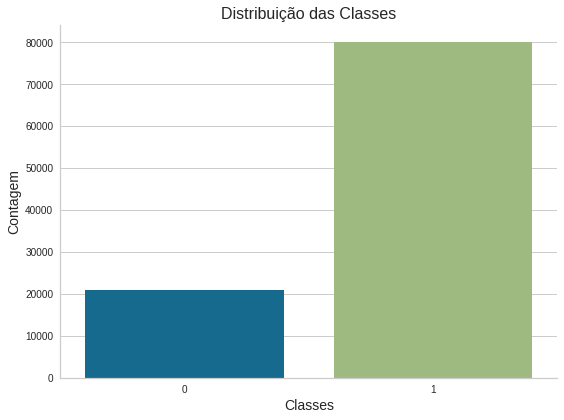

In [25]:
print("Porcentagem de cada classe presente na variável TARGET:")
print(round((df_train['TARGET'].value_counts() / df_train.shape[0]) * 100, 2))
print("\n")

# Construindo o gráfico
fig, ax = plt.subplots(figsize=(8,6))

sns.countplot(x = df_train['TARGET'], ax=ax)
sns.despine()

ax.set_title("Distribuição das Classes", fontsize=16)
ax.set_xlabel("Classes", fontsize=14)
ax.set_ylabel("Contagem", fontsize=14)

plt.tight_layout()

# Tratamento dos dados

### Concatenando os datasets Train e Test.

In [26]:
df_completo = pd.concat([df_train, df_test])

In [27]:
df_completo.head(10)

,REF_DATE,TARGET,VAR2,IDADE,VAR4,VAR5,VAR6,VAR7,VAR8,VAR9,VAR10,VAR11,VAR12,VAR13,VAR14,VAR15,VAR16,VAR17,VAR18,VAR19,VAR20,VAR21,VAR22,VAR23,VAR24,VAR25,VAR26,VAR27,VAR28,VAR29,VAR30,VAR31,VAR32,VAR33,VAR34,VAR35,VAR36,VAR37,VAR38,VAR39,VAR40,VAR41,VAR42,VAR43,VAR44,VAR45,VAR46,VAR47,VAR48,VAR49,VAR50,VAR51,VAR52,VAR53,VAR54,VAR55,VAR56,VAR57,VAR58,VAR59,VAR60,VAR61,VAR62,VAR63,VAR64,VAR65,VAR66,VAR67,VAR68,VAR69,VAR70,VAR71,VAR72,VAR73,VAR74,VAR75,VAR76,VAR77,VAR78,VAR79,VAR80,VAR81,VAR82,VAR83,VAR84,VAR85,VAR86,VAR87,VAR88,VAR89,VAR90,VAR91,VAR92,VAR93,VAR94,VAR95,VAR96,VAR97,VAR98,VAR99,VAR100,VAR101,VAR102,VAR103,VAR104,VAR105,VAR106,VAR107,VAR108,VAR109,VAR110,VAR111,VAR112,VAR113,VAR114,VAR115,VAR116,VAR117,VAR118,VAR119,VAR120,VAR121,VAR122,VAR123,VAR124,VAR125,VAR126,VAR127,VAR128,VAR129,VAR130,VAR131,VAR132,VAR133,VAR134,VAR135,VAR136,VAR137,VAR138,VAR139,VAR140,VAR141,VAR142,VAR143,VAR144,VAR145,VAR146,VAR147,VAR148,VAR149,ID
0,2017-06-16 00:00:00+00:00,1,F,76.126,NaN,SP,-23.568523,-46.804297,C,E,BAIXA,2.0,0.305,NaN,0.146,0.138,NaN,NaN,0.503899,0.347735,NaN,NaN,0.250,NaN,0.052,0.129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.624806,0.480278,0.526963,0.761115,NaN,NaN,NaN,NaN,1.000,NaN,S,N,N,S,N,N,N,S,N,N,N,N,S,N,S,S,N,ALTA,ALTISSIMA,ALTISSIMA,ALTISSIMA,ALTA,MEDIA,ALTISSIMA,ALTA,ALTA,ALTA,ALTISSIMA,ALTISSIMA,ALTA,ALTA,ALTA,ALTA,ALTISSIMA,ALTA,ALTISSIMA,ALTISSIMA,ALTA,ALTA,ALTA,ALTA,BAIXISSIMA,MEDIA,ALTA,ALTISSIMA,ALTA,ALTISSIMA,MEDIA,ALTA,ALTA,MEDIA,ALTISSIMA,ALTA,MEDIO,MEDIO,LONGE,LONGE,LONGE,MEDIO,MEDIO,MEDIO,LONGE,LONGE,LONGE,MEDIO,PROXIMO,MEDIO,LONGE,MEDIO,MUITO PROXIMO,LONGE,MUITO LONGE,MEDIO,MEDIO,LONGE,LONGE,LONGE,LONGE,MEDIO,LONGE,LONGE,MEDIO,MEDIO,LONGE,MEDIO,LONGE,MEDIO,PROXIMO,MEDIO,MEDIO,LONGE,MUITO PROXIMO,4094.377623,C,NaN,NaN,NaN,NaN,102,EMAIL INEXISTENTE#@#NOME INEXISTENTE#@#CEP INE...,2.6.1,123791
1,2017-02-07 00:00:00+00:00,1,NaN,NaN,NaN,SP,-23.189738,-46.815943,NaN,E,MEDIA,0.0,0.205,NaN,0.105,0.114,3.833333,NaN,0.128767,1.309589,NaN,NaN,0.250,NaN,0.138,0.065,NaN,NaN,NaN,NaN,NaN,NaN,DECLARACAO NAO ENVIADA,NaN,NaN,NaN,NaN,NaN,NaN,0.380323,0.389401,0.421293,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MEDIA,BAIXISSIMA,MEDIA,ALTA,MEDIA,MEDIA,ALTA,ALTA,ALTA,MEDIA,ALTA,BAIXISSIMA,MEDIA,ALTA,MEDIA,MEDIA,ALTA,ALTA,ALTA,ALTA,MEDIA,MEDIA,ALTA,ALTA,BAIXISSIMA,MEDIA,MEDIA,BAIXISSIMA,ALTA,ALTA,ALTA,ALTISSIMA,MEDIA,MEDIA,ALTISSIMA,ALTISSIMA,LONGE,LONGE,LONGE,LONGE,LONGE,LONGE,MEDIO,PROXIMO,MEDIO,LONGE,LONGE,PROXIMO,LONGE,LONGE,MEDIO,LONGE,PROXIMO,LONGE,MUITO LONGE,MEDIO,LONGE,MEDIO,LONGE,PROXIMO,MEDIO,MEDIO,LONGE,MEDIO,LONGE,LONGE,MEDIO,MEDIO,LONGE,MEDIO,PROXIMO,LONGE,MEDIO,MEDIO,MUITO PROXIMO,1347.882336,E,NaN,NaN,NaN,NaN,102,EMAIL INEXISTENTE#@#NOME INEXISTENTE#@#CEP INE...,2.6.1,246754
2,2017-03-11 00:00:00+00:00,1,NaN,NaN,NaN,PE,-7.563015,-35.013143,NaN,E,ALTISSIMA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.211022,0.412692,0.870564,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,ALTA,BAIXISSIMA,MEDIA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,MEDIA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,MEDIA,BAIXISSIMA,MEDIA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXA,BAIXISSIMA,BAIXISSIMA,LONGE,MUITO LONGE,MUITO LONGE,MUITO LONGE,MUITO LONGE,MUITO LONGE,LONGE,LONGE,LONGE,MUITO LONGE,MUITO LONGE,PROXIMO,LONGE,LONGE,MUITO LONGE,LONGE,LONGE,PROXIMO,MUITO LONGE,PROXIMO,MUITO LONGE,MUITO LONGE,MUITO LONGE,LONGE,MUITO LONGE,MEDIO,MUITO LONGE,LONGE,MUITO LONGE,MEDIO,MUITO LONGE,MUITO LONGE,MUITO LONGE,LONGE,LONGE,LONGE,LONGE,MUITO LONGE,MUITO PROXIMO,1428.485398,E,NaN,NaN,NaN,NaN,102,NOME INEXISTENTE#@#EMAIL INEXISTENTE,2.6.1,169817
3,2017-04-28 00:00:00+00:00,1,F,65.786,NaN,AM,-3.119028,-60

In [28]:
# Adicionando a coluna ID como index
df_completo = df_completo.set_index('ID')

### Fazendo uma cópia do dataset original.

In [29]:
df_copia = df_completo.copy()

###Excluindo algumas colunas desnecessárias. 

In [30]:
df_copia.drop(['VAR148', 'VAR4', 'REF_DATE'], axis = 1, inplace=True)

In [31]:
df_copia.head()

,TARGET,VAR2,IDADE,VAR5,VAR6,VAR7,VAR8,VAR9,VAR10,VAR11,VAR12,VAR13,VAR14,VAR15,VAR16,VAR17,VAR18,VAR19,VAR20,VAR21,VAR22,VAR23,VAR24,VAR25,VAR26,VAR27,VAR28,VAR29,VAR30,VAR31,VAR32,VAR33,VAR34,VAR35,VAR36,VAR37,VAR38,VAR39,VAR40,VAR41,VAR42,VAR43,VAR44,VAR45,VAR46,VAR47,VAR48,VAR49,VAR50,VAR51,VAR52,VAR53,VAR54,VAR55,VAR56,VAR57,VAR58,VAR59,VAR60,VAR61,VAR62,VAR63,VAR64,VAR65,VAR66,VAR67,VAR68,VAR69,VAR70,VAR71,VAR72,VAR73,VAR74,VAR75,VAR76,VAR77,VAR78,VAR79,VAR80,VAR81,VAR82,VAR83,VAR84,VAR85,VAR86,VAR87,VAR88,VAR89,VAR90,VAR91,VAR92,VAR93,VAR94,VAR95,VAR96,VAR97,VAR98,VAR99,VAR100,VAR101,VAR102,VAR103,VAR104,VAR105,VAR106,VAR107,VAR108,VAR109,VAR110,VAR111,VAR112,VAR113,VAR114,VAR115,VAR116,VAR117,VAR118,VAR119,VAR120,VAR121,VAR122,VAR123,VAR124,VAR125,VAR126,VAR127,VAR128,VAR129,VAR130,VAR131,VAR132,VAR133,VAR134,VAR135,VAR136,VAR137,VAR138,VAR139,VAR140,VAR141,VAR142,VAR143,VAR144,VAR145,VAR146,VAR147,VAR149
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
123791,1,F,76.126,SP,-23.568523,-46.804297,C,E,BAIXA,2.0,0.305,NaN,0.146,0.138,NaN,NaN,0.503899,0.347735,NaN,NaN,0.250,NaN,0.052,0.129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.624806,0.480278,0.526963,0.761115,NaN,NaN,NaN,NaN,1.000,NaN,S,N,N,S,N,N,N,S,N,N,N,N,S,N,S,S,N,ALTA,ALTISSIMA,ALTISSIMA,ALTISSIMA,ALTA,MEDIA,ALTISSIMA,ALTA,ALTA,ALTA,ALTISSIMA,ALTISSIMA,ALTA,ALTA,ALTA,ALTA,ALTISSIMA,ALTA,ALTISSIMA,ALTISSIMA,ALTA,ALTA,ALTA,ALTA,BAIXISSIMA,MEDIA,ALTA,ALTISSIMA,ALTA,ALTISSIMA,MEDIA,ALTA,ALTA,MEDIA,ALTISSIMA,ALTA,MEDIO,MEDIO,LONGE,LONGE,LONGE,MEDIO,MEDIO,MEDIO,LONGE,LONGE,LONGE,MEDIO,PROXIMO,MEDIO,LONGE,MEDIO,MUITO PROXIMO,LONGE,MUITO LONGE,MEDIO,MEDIO,LONGE,LONGE,LONGE,LONGE,MEDIO,LONGE,LONGE,MEDIO,MEDIO,LONGE,MEDIO,LONGE,MEDIO,PROXIMO,MEDIO,MEDIO,LONGE,MUITO PROXIMO,4094.377623,C,NaN,NaN,NaN,NaN,102,2.6.1
246754,1,NaN,NaN,SP,-23.189738,-46.815943,NaN,E,MEDIA,0.0,0.205,NaN,0.105,0.114,3.833333,NaN,0.128767,1.309589,NaN,NaN,0.250,NaN,0.138,0.065,NaN,NaN,NaN,NaN,NaN,NaN,DECLARACAO NAO ENVIADA,NaN,NaN,NaN,NaN,NaN,NaN,0.380323,0.389401,0.421293,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MEDIA,BAIXISSIMA,MEDIA,ALTA,MEDIA,MEDIA,ALTA,ALTA,ALTA,MEDIA,ALTA,BAIXISSIMA,MEDIA,ALTA,MEDIA,MEDIA,ALTA,ALTA,ALTA,ALTA,MEDIA,MEDIA,ALTA,ALTA,BAIXISSIMA,MEDIA,MEDIA,BAIXISSIMA,ALTA,ALTA,ALTA,ALTISSIMA,MEDIA,MEDIA,ALTISSIMA,ALTISSIMA,LONGE,LONGE,LONGE,LONGE,LONGE,LONGE,MEDIO,PROXIMO,MEDIO,LONGE,LONGE,PROXIMO,LONGE,LONGE,MEDIO,LONGE,PROXIMO,LONGE,MUITO LONGE,MEDIO,LONGE,MEDIO,LONGE,PROXIMO,MEDIO,MEDIO,LONGE,MEDIO,LONGE,LONGE,MEDIO,MEDIO,LONGE,MEDIO,PROXIMO,LONGE,MEDIO,MEDIO,MUITO PROXIMO,1347.882336,E,NaN,NaN,NaN,NaN,102,2.6.1
169817,1,NaN,NaN,PE,-7.563015,-35.013143,NaN,E,ALTISSIMA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.211022,0.412692,0.870564,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,ALTA,BAIXISSIMA,MEDIA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,MEDIA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,MEDIA,BAIXISSIMA,MEDIA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXA,BAIXISSIMA,BAIXISSIMA,LONGE,MUITO LONGE,MUITO LONGE,MUITO LONGE,MUITO LONGE,MUITO LONGE,LONGE,LONGE,LONGE,MUITO LONGE,MUITO LONGE,PROXIMO,LONGE,LONGE,MUITO LONGE,LONGE,LONGE,PROXIMO,MUITO LONGE,PROXIMO,MUITO LONGE,MUITO LONGE,MUITO LONGE,LONGE,MUITO LONGE,MEDIO,MUITO LONGE,LONGE,MUITO LONGE,MEDIO,MUITO LONGE,MUITO LONGE,MUITO LONGE,LONGE,LONGE,LONGE,LONGE,MUITO LONGE,MUITO PROXIMO,1428.485398,E,NaN,NaN,NaN,NaN,102,2.6.1
26525,1,F,65.786,AM,-3.119028,-60.021731,NaN,E,MEDIA,NaN,0.173,NaN,0.129,0.029,NaN,NaN,1.493151,0.550685,NaN,NaN,0.125,NaN,0.000,0.000,NaN,NaN,NaN,0.167,NaN,NaN,NaN,N

### Separando as colunas categóricas e as numéricas

A intenção da separação é para facilitar o preenchimento dos valores ausentes, posteriormente.

In [32]:
col_num = df_copia.select_dtypes(exclude='object').columns
col_cat = df_copia.select_dtypes(include='object').columns

In [33]:
# Substituindo valores ausentes nas variáveis numéricas
num_imputer = SimpleImputer(missing_values = np.nan, strategy='median')
num_imputer = num_imputer.fit(df_copia.loc[:, col_num])
df_copia.loc[:, col_num] = num_imputer.transform(df_copia.loc[:, col_num])

In [34]:
# Substituindo valores ausentes nas variáveis categóricas
cat_imputer = SimpleImputer(missing_values = np.nan, strategy='most_frequent')
cat_imputer = cat_imputer.fit(df_copia.loc[:, col_cat])
df_copia.loc[:, col_cat] = cat_imputer.transform(df_copia.loc[:, col_cat])

In [35]:
df_copia.head()

,TARGET,VAR2,IDADE,VAR5,VAR6,VAR7,VAR8,VAR9,VAR10,VAR11,VAR12,VAR13,VAR14,VAR15,VAR16,VAR17,VAR18,VAR19,VAR20,VAR21,VAR22,VAR23,VAR24,VAR25,VAR26,VAR27,VAR28,VAR29,VAR30,VAR31,VAR32,VAR33,VAR34,VAR35,VAR36,VAR37,VAR38,VAR39,VAR40,VAR41,VAR42,VAR43,VAR44,VAR45,VAR46,VAR47,VAR48,VAR49,VAR50,VAR51,VAR52,VAR53,VAR54,VAR55,VAR56,VAR57,VAR58,VAR59,VAR60,VAR61,VAR62,VAR63,VAR64,VAR65,VAR66,VAR67,VAR68,VAR69,VAR70,VAR71,VAR72,VAR73,VAR74,VAR75,VAR76,VAR77,VAR78,VAR79,VAR80,VAR81,VAR82,VAR83,VAR84,VAR85,VAR86,VAR87,VAR88,VAR89,VAR90,VAR91,VAR92,VAR93,VAR94,VAR95,VAR96,VAR97,VAR98,VAR99,VAR100,VAR101,VAR102,VAR103,VAR104,VAR105,VAR106,VAR107,VAR108,VAR109,VAR110,VAR111,VAR112,VAR113,VAR114,VAR115,VAR116,VAR117,VAR118,VAR119,VAR120,VAR121,VAR122,VAR123,VAR124,VAR125,VAR126,VAR127,VAR128,VAR129,VAR130,VAR131,VAR132,VAR133,VAR134,VAR135,VAR136,VAR137,VAR138,VAR139,VAR140,VAR141,VAR142,VAR143,VAR144,VAR145,VAR146,VAR147,VAR149
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
123791,1.0,F,76.126,SP,-23.568523,-46.804297,C,E,BAIXA,2.0,0.305,0.321,0.146,0.138,0.833333,0.819178,0.503899,0.347735,0.011,0.25,0.250,0.043,0.052,0.129,0.333,0.0,0.0,0.104,0.125,BANCO DO BRASIL,DECLARACAO NAO ENVIADA,S,PMDB,S,S,134.0,S,0.624806,0.480278,0.526963,0.761115,S,769.0,S,5521.575,1.000,N,S,N,N,S,N,N,N,S,N,N,N,N,S,N,S,S,N,ALTA,ALTISSIMA,ALTISSIMA,ALTISSIMA,ALTA,MEDIA,ALTISSIMA,ALTA,ALTA,ALTA,ALTISSIMA,ALTISSIMA,ALTA,ALTA,ALTA,ALTA,ALTISSIMA,ALTA,ALTISSIMA,ALTISSIMA,ALTA,ALTA,ALTA,ALTA,BAIXISSIMA,MEDIA,ALTA,ALTISSIMA,ALTA,ALTISSIMA,MEDIA,ALTA,ALTA,MEDIA,ALTISSIMA,ALTA,MEDIO,MEDIO,LONGE,LONGE,LONGE,MEDIO,MEDIO,MEDIO,LONGE,LONGE,LONGE,MEDIO,PROXIMO,MEDIO,LONGE,MEDIO,MUITO PROXIMO,LONGE,MUITO LONGE,MEDIO,MEDIO,LONGE,LONGE,LONGE,LONGE,MEDIO,LONGE,LONGE,MEDIO,MEDIO,LONGE,MEDIO,LONGE,MEDIO,PROXIMO,MEDIO,MEDIO,LONGE,MUITO PROXIMO,4094.377623,C,N,N,3024.48,935.12,102.0,2.6.1
246754,1.0,F,39.838,SP,-23.189738,-46.815943,E,E,MEDIA,0.0,0.205,0.321,0.105,0.114,3.833333,0.819178,0.128767,1.309589,0.011,0.25,0.250,0.043,0.138,0.065,0.333,0.0,0.0,0.104,0.125,BANCO DO BRASIL,DECLARACAO NAO ENVIADA,S,PMDB,S,S,134.0,S,0.380323,0.389401,0.421293,0.496036,S,769.0,S,5521.575,0.000,N,S,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,MEDIA,BAIXISSIMA,MEDIA,ALTA,MEDIA,MEDIA,ALTA,ALTA,ALTA,MEDIA,ALTA,BAIXISSIMA,MEDIA,ALTA,MEDIA,MEDIA,ALTA,ALTA,ALTA,ALTA,MEDIA,MEDIA,ALTA,ALTA,BAIXISSIMA,MEDIA,MEDIA,BAIXISSIMA,ALTA,ALTA,ALTA,ALTISSIMA,MEDIA,MEDIA,ALTISSIMA,ALTISSIMA,LONGE,LONGE,LONGE,LONGE,LONGE,LONGE,MEDIO,PROXIMO,MEDIO,LONGE,LONGE,PROXIMO,LONGE,LONGE,MEDIO,LONGE,PROXIMO,LONGE,MUITO LONGE,MEDIO,LONGE,MEDIO,LONGE,PROXIMO,MEDIO,MEDIO,LONGE,MEDIO,LONGE,LONGE,MEDIO,MEDIO,LONGE,MEDIO,PROXIMO,LONGE,MEDIO,MEDIO,MUITO PROXIMO,1347.882336,E,N,N,3024.48,935.12,102.0,2.6.1
169817,1.0,F,39.838,PE,-7.563015,-35.013143,E,E,ALTISSIMA,0.0,0.127,0.321,0.127,0.111,0.833333,0.819178,1.052055,1.139726,0.011,0.25,0.125,0.043,0.034,0.000,0.333,0.0,0.0,0.104,0.125,BANCO DO BRASIL,DECLARACAO NAO ENVIADA,S,PMDB,S,S,134.0,S,0.211022,0.412692,0.870564,0.496036,S,769.0,S,5521.575,0.000,N,S,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,ALTA,BAIXISSIMA,MEDIA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,MEDIA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,MEDIA,BAIXISSIMA,MEDIA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXA,BAIXISSIMA,BAIXISSIMA,LONGE,MUITO LONGE,MUITO LONGE,MUITO LONGE,MUITO LONGE,MUITO LONGE,LONGE,LONGE,LONGE,MUITO LONGE,MUITO LONGE,PROXIMO,LONGE,LONGE,MUITO LONGE,LONGE,LONGE,PROXIMO,MUITO LONGE,PROXIMO,MUITO LONGE,MUITO LONGE,MUITO LONGE,LONGE,MUITO LONGE,MEDIO,MUITO LONGE,LONGE,MUITO LONGE,MEDIO,MUITO LONGE,MUITO LONGE,MUITO LONGE,LONGE,LONGE,LONGE,LONGE,MUITO LONGE,MUITO PROXIMO,1428.485398,E,N,N,3024.48,935.12,102.0,2.6.1
26525,1.0,F,65.786,AM,-3.119028,-60.021731,E,E,MEDIA,0.0,

In [36]:
# Verificando se há valores ausentes
print("Valores ausentes:")
df_copia.isnull().sum()

Valores ausentes:


TARGET    0
VAR2      0
IDADE     0
VAR5      0
VAR6      0
VAR7      0
VAR8      0
VAR9      0
VAR10     0
VAR11     0
VAR12     0
VAR13     0
VAR14     0
VAR15     0
VAR16     0
VAR17     0
VAR18     0
VAR19     0
VAR20     0
VAR21     0
VAR22     0
VAR23     0
VAR24     0
VAR25     0
VAR26     0
VAR27     0
VAR28     0
VAR29     0
VAR30     0
VAR31     0
VAR32     0
VAR33     0
VAR34     0
VAR35     0
VAR36     0
VAR37     0
VAR38     0
VAR39     0
VAR40     0
VAR41     0
VAR42     0
VAR43     0
VAR44     0
VAR45     0
VAR46     0
VAR47     0
VAR48     0
VAR49     0
VAR50     0
VAR51     0
VAR52     0
VAR53     0
VAR54     0
VAR55     0
VAR56     0
VAR57     0
VAR58     0
VAR59     0
VAR60     0
VAR61     0
VAR62     0
VAR63     0
VAR64     0
VAR65     0
VAR66     0
VAR67     0
VAR68     0
VAR69     0
VAR70     0
VAR71     0
VAR72     0
VAR73     0
VAR74     0
VAR75     0
VAR76     0
VAR77     0
VAR78     0
VAR79     0
VAR80     0
VAR81     0
VAR82     0
VAR83     0
VAR84     0
VAR8

### Padronização das variáveis

In [37]:
df_padronizado = df_copia.copy()

# Padronizando as variáveis numéricas
colunas_numericas = df_padronizado.drop('TARGET', axis = 1).select_dtypes(exclude = 'object').columns

df_padronizado[colunas_numericas] = StandardScaler().fit_transform(df_padronizado[colunas_numericas].values)

In [38]:
df_encoder = df_padronizado.copy()

# Extraindo os valores Categóricas
colunas_categoricas = df_encoder.select_dtypes('object').columns

# Padronizando as variáveis Categóricas
for col in colunas_categoricas:
    df_encoder[col+'_enc'] = LabelEncoder().fit_transform(df_encoder[col])
    df_encoder.drop(col, axis=1, inplace=True)

In [39]:
df_encoder.head()

,TARGET,IDADE,VAR6,VAR7,VAR11,VAR12,VAR13,VAR14,VAR15,VAR16,VAR17,VAR18,VAR19,VAR20,VAR21,VAR22,VAR23,VAR24,VAR25,VAR26,VAR27,VAR28,VAR29,VAR30,VAR37,VAR39,VAR40,VAR41,VAR42,VAR44,VAR46,VAR47,VAR141,VAR145,VAR146,VAR147,VAR2_enc,VAR5_enc,VAR8_enc,VAR9_enc,VAR10_enc,VAR31_enc,VAR32_enc,VAR33_enc,VAR34_enc,VAR35_enc,VAR36_enc,VAR38_enc,VAR43_enc,VAR45_enc,VAR48_enc,VAR49_enc,VAR50_enc,VAR51_enc,VAR52_enc,VAR53_enc,VAR54_enc,VAR55_enc,VAR56_enc,VAR57_enc,VAR58_enc,VAR59_enc,VAR60_enc,VAR61_enc,VAR62_enc,VAR63_enc,VAR64_enc,VAR65_enc,VAR66_enc,VAR67_enc,VAR68_enc,VAR69_enc,VAR70_enc,VAR71_enc,VAR72_enc,VAR73_enc,VAR74_enc,VAR75_enc,VAR76_enc,VAR77_enc,VAR78_enc,VAR79_enc,VAR80_enc,VAR81_enc,VAR82_enc,VAR83_enc,VAR84_enc,VAR85_enc,VAR86_enc,VAR87_enc,VAR88_enc,VAR89_enc,VAR90_enc,VAR91_enc,VAR92_enc,VAR93_enc,VAR94_enc,VAR95_enc,VAR96_enc,VAR97_enc,VAR98_enc,VAR99_enc,VAR100_enc,VAR101_enc,VAR102_enc,VAR103_enc,VAR104_enc,VAR105_enc,VAR106_enc,VAR107_enc,VAR108_enc,VAR109_enc,VAR110_enc,VAR111_enc,VAR112_enc,VAR113_enc,VAR114_enc,VAR115_enc,VAR116_enc,VAR117_enc,VAR118_enc,VAR119_enc,VAR120_enc,VAR121_enc,VAR122_enc,VAR123_enc,VAR124_enc,VAR125_enc,VAR126_enc,VAR127_enc,VAR128_enc,VAR129_enc,VAR130_enc,VAR131_enc,VAR132_enc,VAR133_enc,VAR134_enc,VAR135_enc,VAR136_enc,VAR137_enc,VAR138_enc,VAR139_enc,VAR140_enc,VAR142_enc,VAR143_enc,VAR144_enc,VAR149_enc
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
123791,1.0,2.385648,-1.035031,-0.118336,3.687399,0.636794,0.004852,0.021552,-0.064809,-0.22358,-0.190964,-1.108163,-1.072178,-0.083506,-0.166203,0.634145,-0.118869,-0.152338,1.056852,-0.008749,-0.043473,-0.034108,-0.118603,-0.130141,-0.091004,1.137061,-0.443270,-0.462817,3.923224,-0.024368,-0.01605,1.831129,2.442730,-0.018235,-0.010765,0.293155,0,25,2,4,2,1,3,0,8,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,1,0,0,1,1,1,0,4,1,0,0,0,1,1,0,0,0,0,1,0,1,1,0,0,0,0,1,4,0,1,0,1,4,0,0,4,0,0,1,1,0,0,0,1,1,1,0,0,0,1,4,1,0,1,3,0,0,1,1,0,0,0,0,1,0,0,1,1,0,1,0,1,4,1,1,0,3,2,0,0,0
246754,1.0,-0.141513,-0.992334,-0.119905,-0.288262,0.128464,0.004852,-0.348571,-0.234835,1.24966,-0.190964,-1.958038,0.154549,-0.083506,-0.166203,0.634145,-0.118869,0.528997,0.373101,-0.008749,-0.043473,-0.034108,-0.118603,-0.130141,-0.091004,-0.560721,-1.238386,-0.942388,-0.116731,-0.024368,-0.01605,-0.630199,-0.551985,-0.018235,-0.010765,0.293155,0,25,4,4,4,1,3,0,8,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,2,3,0,3,4,0,0,0,3,0,2,3,0,3,4,0,0,0,0,3,4,0,0,1,4,3,2,0,0,0,1,3,4,0,1,0,0,0,0,0,0,1,4,1,0,0,4,0,0,1,0,4,0,0,1,0,1,0,4,1,1,0,1,0,0,1,1,0,1,4,0,1,1,3,4,0,0,0
169817,1.0,-0.141513,0.769136,1.469775,-0.288262,-0.268033,0.004852,-0.149968,-0.256088,-0.22358,-0.190964,0.133704,-0.062091,-0.083506,-0.166203,-0.325805,-0.118869,-0.294943,-0.321334,-0.008749,-0.043473,-0.034108,-0.118603,-0.130141,-0.091004,-1.736411,-1.034605,1.096573,-0.116731,-0.024368,-0.01605,-0.630199,-0.464097,-0.018235,-0.010765,0.293155,0,15,4,4,1,1,3,0,8,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,0,2,4,2,2,2,2,3,2,2,2,2,3,2,2,2,2,2,3,2,2,1,3,3,2,3,2,3,2,2,2,1,2,0,2,2,2,2,2,0,0,0,2,2,4,0,0,2,0,0,4,0,3,2,2,2,0,2,1,2,0,2,1,2,2,2,0,0,0,0,2,3,4,0,0,0
26525,1.0,1.665552,1.270069,-1.898549,-0.288262,-0.034201,0.004852,-0.131914,-0.837012,-0.22358,-0.190964,1.133022,-0.813340,-0.083506,-0.166203,-0.325805,-0.118869,-0.564308,-0.321334,-0.008749,-0.043473,-0.034108,0.792339,-0.130141,-0.091004,0.459075,-1.127164,-1.369362,-0.516689,-0.024368,-0.01605,-0.625277,-0.409149,-0.018235,-0.010765,0.293155,0,2,4,4,4,1,3,0,8,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,3,1,0,0,1,1,0,0,0,0,0,4,1,3,1,3,1,1,1,0,1,0,0,1,0,0,0,3,1,1,1,3,0,0,1,0,0,1,4,0,0,4,4,1,4,0,0,4,4,2,0,2,1,4,1,4,1,2,0,1,4,4,0,0,1,4,2,0,1,1,0,4,0,0,0
143859,1.0,-1.180568,0.492755,-2.945975,-0.288262,-0.268033,0.004852,-0.673556,-0.496959,-0.22358,-0.190964,-0.046297,-0.187881,-0.083506,-0.166203,-0.325805,-0.118869,-0.429625,-0.32133

In [40]:
# Verificando os tipos de todas as colunas
pd.DataFrame(df_encoder.dtypes)

,0
TARGET,float64
IDADE,float64
VAR6,float64
VAR7,float64
VAR11,float64
VAR12,float64
VAR13,float64
VAR14,float64
VAR15,float64
VAR16,float64


# Inicio da construção do modelo de Machine Learning.

In [41]:
# Garantindo a replicabilidade
np.random.seed(874)

# Separando as variáveis X e y
X = df_encoder.drop('TARGET', axis = 1)
y = df_encoder['TARGET']

# Separando o train e test
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [42]:
# Replicabilidade
np.random.seed(874)

# Modelo para balanceamento
und = RandomUnderSampler()

X_train_balanceado, y_train_balanceado = und.fit_resample(X_train, y_train)

Entradas da variável target_default após o balanceamento:
0.0    23525
1.0    23525
Name: TARGET, dtype: int64 



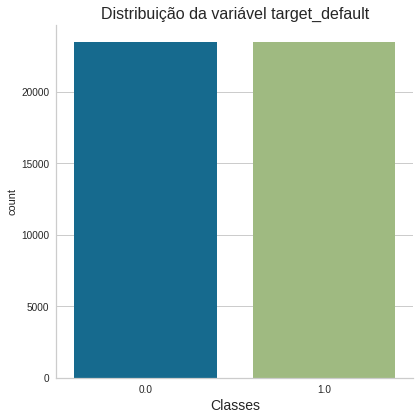

In [43]:
# Verificando o balanceamento dos dados
print("Entradas da variável target_default após o balanceamento:")
print(pd.Series(y_train_balanceado).value_counts(), "\n")

# Plotando a nova distribuição da variável target_default
fig, ax = plt.subplots(figsize=(6, 6))

sns.countplot(pd.Series(y_train_balanceado), ax=ax)

sns.despine()

ax.set_title("Distribuição da variável target_default", fontsize=16)
ax.set_xlabel("Classes", fontsize=14)

plt.tight_layout()

# Modelos de Machine Learning

Avaliei cinco algoritmos de Machine Learning para o problema apresentado, são:

Regressão Logística;

Árvores de Decisão;

Random Forest;

XGBoost;

LightGBM.

Usando a técnica de validação cruzada, vamos ver o desempenho desses cinco algoritmos com os dados balanceados. Usaremos as seguintes métricas para avaliar os modelos:

Acurácia;

Precisão;

Recall;

Área sob a curva ROC.

Em seguida, gerarei um DataFrame com os resultados de cada um dos modelos para facilitar a visualização e a escolha do melhor modelo.

In [44]:
# Criando os modelos usando validação cruzada

logreg_balanceado  = cross_validate(LogisticRegression(solver='liblinear'), X_train_balanceado, y_train_balanceado, cv=5, scoring=['accuracy', 'precision', 'recall', 'roc_auc'])

trees_balanceado  = cross_validate(DecisionTreeClassifier(), X_train_balanceado, y_train_balanceado, cv=5, scoring=['accuracy', 'precision', 'recall', 'roc_auc'])

forest_balanceado  = cross_validate(RandomForestClassifier(), X_train_balanceado, y_train_balanceado, cv=5, scoring=['accuracy', 'precision', 'recall', 'roc_auc'])

xgb_balanceado  = cross_validate(XGBClassifier(), X_train_balanceado, y_train_balanceado, cv=5, scoring=['accuracy', 'precision', 'recall', 'roc_auc'])

lgbm_balanceado = cross_validate(LGBMClassifier(), X_train_balanceado, y_train_balanceado, cv=5, scoring=['accuracy', 'precision', 'recall', 'roc_auc'])

In [45]:
# Gerando um DataFrame com os resultados de cada modelo
summary = pd.DataFrame({
            'labels': ['accuracy', 'precision', 'recall', 'roc_auc'],
            'logreg_balanceado': [logreg_balanceado['test_accuracy'].mean(), logreg_balanceado['test_precision'].mean(), logreg_balanceado['test_recall'].mean(), logreg_balanceado['test_roc_auc'].mean()],
            'trees_balanceado': [trees_balanceado['test_accuracy'].mean(), trees_balanceado['test_precision'].mean(), trees_balanceado['test_recall'].mean(), trees_balanceado['test_roc_auc'].mean()],
            'forest_balanceado': [forest_balanceado['test_accuracy'].mean(), forest_balanceado['test_precision'].mean(), forest_balanceado['test_recall'].mean(), forest_balanceado['test_roc_auc'].mean()],
            'xgb_balanceado': [xgb_balanceado['test_accuracy'].mean(), xgb_balanceado['test_precision'].mean(), xgb_balanceado['test_recall'].mean(), xgb_balanceado['test_roc_auc'].mean()],
            'lgbm_balanceado': [lgbm_balanceado['test_accuracy'].mean(), lgbm_balanceado['test_precision'].mean(), lgbm_balanceado['test_recall'].mean(), lgbm_balanceado['test_roc_auc'].mean()]           
}).set_index('labels')
summary.index.name=None
summary = summary.transpose()    
summary.style.applymap(lambda x: 'background-color: green' if x >= 0.60 else '')

,accuracy,precision,recall,roc_auc
logreg_balanceado,0.598023,0.606081,0.560383,0.632816
trees_balanceado,0.542189,0.542397,0.539766,0.541048
forest_balanceado,0.606929,0.608467,0.600383,0.647831
xgb_balanceado,0.625717,0.636039,0.588140,0.672928
lgbm_balanceado,0.630946,0.635907,0.612837,0.678835


De uma forma geral, os dados balanceados apresentaram ótimos resultados considerando as cinco métricas utilizadas. 

Dentre os algoritmos, LightGBM apresentou os melhores resultados e, portanto, a combinação desse modelo com os dados balanceados foi a escolhida para o projeto.

### Hiperparâmetros

Para realizar um ajuste fino no modelo, utilizei a técnica de Grid Search para escolher o melhor valor para os seguintes hiperparâmetros:

learning_rate;

n_estimators;

num_leaves;

max_depth;

min_child_weight.

In [46]:
# Garantindo replicabilidade
np.random.seed(874)

# Modelo LightGBM
lgbm_model = LGBMClassifier(learning_rate = 0.1)

# Ajustando o melhor valor para n_estimators
par = {'n_estimators': range(0, 1000, 50)}

lgbm_clf = GridSearchCV(lgbm_model, par, cv=ShuffleSplit(n_splits=1, test_size=0.3, random_state=77))
lgbm_clf.fit(X_train_balanceado, y_train_balanceado)

# Visualizar o melhor ajuste
print("Melhor ajuste: {}".format(lgbm_clf.best_params_))

Melhor ajuste: {'n_estimators': 200}


In [47]:
# Garantindo replicabilidade
np.random.seed(874)

# Modelo LightGBM
lgbm_model = LGBMClassifier(learning_rate = 0.1, n_estimators = 200)

# Ajustando o melhor valor para num_leaves
par = {'num_leaves': range(1, 100, 1)}

lgbm_clf = GridSearchCV(lgbm_model, par, cv=ShuffleSplit(n_splits=1, test_size=0.3, random_state=77))
lgbm_clf.fit(X_train_balanceado, y_train_balanceado)

# Visualizar o melhor ajuste
print("Melhor ajuste: {}".format(lgbm_clf.best_params_))

Melhor ajuste: {'num_leaves': 14}


In [48]:
# Garantindo replicabilidade
np.random.seed(874)

# Modelo LightGBM
lgbm_model = LGBMClassifier(learning_rate = 0.1, n_estimators = 200, num_leaves = 14, verbose = -1)

# Ajustando o melhor valor para max_depth e para min_child_weight
par = {
    'max_depth': range(1, 10, 1),
    'min_child_weight': range(1, 6, 1)
}

lgbm_clf = GridSearchCV(lgbm_model, par, cv=ShuffleSplit(n_splits=1, test_size=0.3, random_state=77))
lgbm_clf.fit(X_train_balanceado, y_train_balanceado)

# Visualizar o melhor ajuste
print("Melhor ajuste: {}".format(lgbm_clf.best_params_))

Melhor ajuste: {'max_depth': 4, 'min_child_weight': 5}


In [49]:
# Garantindo replicabilidade
np.random.seed(874)

# Modelo LightGBM
lgbm_model = LGBMClassifier(n_estimators = 200, num_leaves = 14, max_depth = 4, min_child_weight = 5)

# Ajustando o melhor valor para max_depth e para min_child_weight
par = {'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}

lgbm_clf = GridSearchCV(lgbm_model, par, cv=ShuffleSplit(n_splits=1, test_size=0.3, random_state=77))
lgbm_clf.fit(X_train_balanceado, y_train_balanceado)

# Visualizar o melhor ajuste
print("Melhor ajuste: {}".format(lgbm_clf.best_params_))

Melhor ajuste: {'learning_rate': 0.1}


In [50]:
# Garantindo replicabilidade
np.random.seed(874)

# Construindo o modelo LightGBM
lgbm_model = LGBMClassifier(learning_rate = 0.1, n_estimators = 200, num_leaves = 14, max_depth = 4, min_child_weight = 5)

# Fit (ajuste) do modelo
lgbm_model.fit(X_train_balanceado, y_train_balanceado)

# Fazendo previsões
y_pred_lgbm = lgbm_model.predict(X_test)

In [51]:
print("Área sob a curva (AUC):\t{}%".format(round(roc_auc_score(y_test, y_pred_lgbm) * 100, 2)))

Área sob a curva (AUC):	63.58%


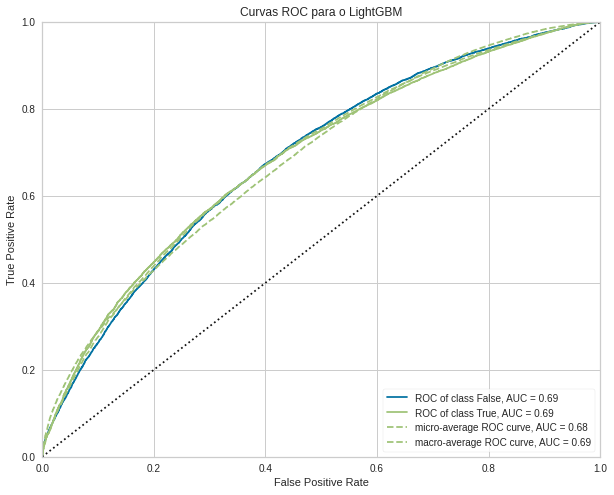

In [52]:
# Plotando a curva ROC:
fig, ax = plt.subplots(figsize=(10,8))
vis_rf = ROCAUC(lgbm_model, classes=['False', 'True'], title="Curvas ROC para o LightGBM")

vis_rf.fit(X_train_balanceado, y_train_balanceado); # Ajusta os dados de treino ao visualizador
vis_rf.score(X_test, y_test); # Avalia o modelo com os dados de teste
vis_rf.show(); # Finaliza e mostra a figura

In [53]:
print(classification_report(y_test, y_pred_lgbm))

              precision    recall  f1-score   support

         0.0       0.31      0.66      0.42      7842
         1.0       0.87      0.61      0.72     29893

    accuracy                           0.62     37735
   macro avg       0.59      0.64      0.57     37735
weighted avg       0.76      0.62      0.66     37735



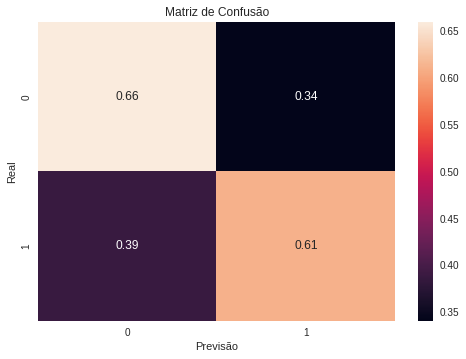

In [54]:
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred_lgbm, normalize='true'), annot=True, ax=ax)
ax.set_title('Matriz de Confusão')
ax.set_ylabel('Real')
ax.set_xlabel('Previsão')
plt.show()

# Salvando o modelo

In [56]:
# Salvando o modelo em um arquivo
joblib.dump(lgbm_model, 'lgbm_model.pkl')
 
# Carregando o modelo do arquivo
lgbm_from_joblib = joblib.load('lgbm_model.pkl')
 
# Usando o modelo carregado para fazer previsões
lgbm_from_joblib.predict(X_test)

array([1., 1., 1., ..., 1., 0., 1.])